Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking

### snippet 2.8

Simple Metropolis algorithm

In [2]:
n_samples = 10000
a3d = ones(n_samples,1,1)
w = 6; l = 3; n = w +l
p = [0.5]
for i in 2:n_samples
  p_new = rand(Normal(p[i-1], 0.1), 1)[1]
  if  p_new < 0
    p_new = abs(p_new)
  end
  if p_new > 1
    p_new = 2 - p_new
  end
  q0 = pdf(Binomial(n, p[i-1]), w)
  q1 = pdf(Binomial(n, p_new), w)
  append!(p, [rand(Uniform(0, 1), 1)[1] < q1/q0 ? p_new : p[i-1]])
end

Create an MCMCChains.Chains object.
This Chains object has length(p) samples, one varable and a single chain.

In [3]:
a3d[:, 1, 1] = p
chns = MCMCChains.Chains(a3d, ["toss"])

Object of type Chains, with data of type 10000×1×1 Array{Float64,3}

Iterations        = 1:10000
Thinning interval = 1
Chains            = 1
Samples per chain = 10000
parameters        = toss

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 1 columns
│ Row │ parameters │ mean     │ std      │ naive_se   │ mcse       │ ess     │
│     │ Symbol     │ Float64  │ Float64  │ Float64    │ Float64    │ Any     │
├─────┼────────────┼──────────┼──────────┼────────────┼────────────┼─────────┤
│ 1   │ toss       │ 0.627334 │ 0.144298 │ 0.00144298 │ 0.00491699 │ 795.845 │

Quantiles

│ Row │ parameters │ 2.5%    │ 25.0%    │ 50.0%    │ 75.0%    │ 97.5%   │
│     │ Symbol     │ Float64 │ Float64  │ Float64  │ Float64  │ Float64 │
├─────┼────────────┼─────────┼──────────┼──────────┼──────────┼─────────┤
│ 1   │ toss       │ 0.32855 │ 0.528482 │ 0.635258 │ 0.734453 │ 0.87767 │


Describe the chain

In [4]:
describe(chns)

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 1 columns
│ Row │ parameters │ mean     │ std      │ naive_se   │ mcse       │ ess     │
│     │ Symbol     │ Float64  │ Float64  │ Float64    │ Float64    │ Any     │
├─────┼────────────┼──────────┼──────────┼────────────┼────────────┼─────────┤
│ 1   │ toss       │ 0.627334 │ 0.144298 │ 0.00144298 │ 0.00491699 │ 795.845 │

Quantiles

│ Row │ parameters │ 2.5%    │ 25.0%    │ 50.0%    │ 75.0%    │ 97.5%   │
│     │ Symbol     │ Float64 │ Float64  │ Float64  │ Float64  │ Float64 │
├─────┼────────────┼─────────┼──────────┼──────────┼──────────┼─────────┤
│ 1   │ toss       │ 0.32855 │ 0.528482 │ 0.635258 │ 0.734453 │ 0.87767 │


Plot the chain

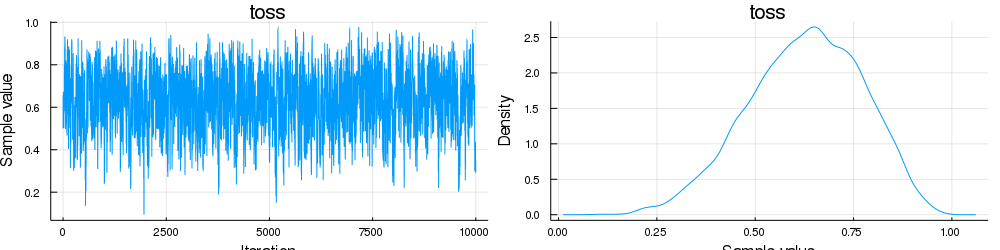

In [5]:
plot(chns)

Show density and computed conjugate solution

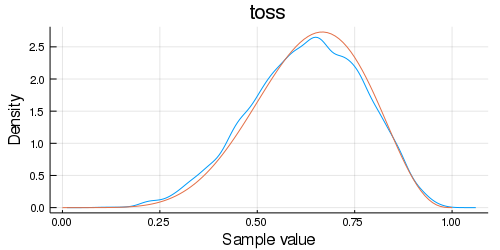

In [6]:
w = 6; n = 9; x = 0:0.01:1
density(chns, lab="Samples")
plot!( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")

End of `02/clip-08.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*